In [1]:
import numpy as np
from astropy.io import fits
from astropy.convolution import Gaussian2DKernel, convolve
import astropy.units as u
import matplotlib.pyplot as plt
import aplpy 

import sys
sys.path.append('/Users/abarnes/GitHub/misc/')
from data_cube_analysis import getdata

plt.style.use('paper.mplstyle')

def smooth_hdu_gaussian(hdu, sigma_x, sigma_y):
    """
    Smooth a 2D HDU with a Gaussian kernel.

    Parameters:
    - hdu: The HDU object to be smoothed.
    - sigma_x: Standard deviation of the Gaussian along the x-axis (in pixels).
    - sigma_y: Standard deviation of the Gaussian along the y-axis (in pixels).

    Returns:
    - smoothed_hdu: The smoothed HDU.
    """

    # Check if the HDU is 2D
    if len(hdu.data.shape) != 2:
        raise ValueError("The provided HDU is not 2D.")

    # Create the Gaussian kernel
    kernel = Gaussian2DKernel(sigma_x, sigma_y)

    # Convolve the HDU data with the kernel
    smoothed_data = convolve(hdu.data, kernel, normalize_kernel=True)

    # Create a new HDU with the smoothed data
    smoothed_hdu = fits.PrimaryHDU(smoothed_data, header=hdu.header)

    return smoothed_hdu

In [2]:
# Example usage:
hdu_max = fits.open('/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/hnco43.TP_7M_12M_weighted_mosaic.rebin.K.kms.0.5kmschannel.galactic.max.fits')[0]
hdu_mom1 = fits.open('/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/hnco43.TP_7M_12M_weighted_mosaic.rebin.K.kms.0.5kmschannel.galactic.mom1.fits')[0]
# hdu_mom2 = fits.open('../data/ACES_HNCO/hnco43.TP_7M_12M_weighted_mosaic.K.kms.rebin.galactic_sigma_masked.fits')[0]

hdu_max_smooth = smooth_hdu_gaussian(hdu_max, 5, 5)
mask = hdu_max_smooth.data<3
mask[np.isnan(hdu_max_smooth.data)] = True
hdu_mom1.data[mask] = np.nan

/Users/abarnes/opt/anaconda3/lib/python3.9/site-packages/astropy/visualization/wcsaxes/core.py:257: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)


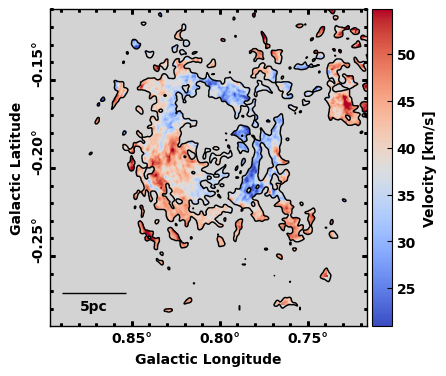

In [3]:
l = 0.8065474
b = -0.1999737
width = 0.2*0.9
height = 0.2*0.9

fig = plt.figure(figsize=(15,5))
mom1 = aplpy.FITSFigure(hdu_mom1, figure=fig, subplot=(1,3,3))
data = hdu_mom1.data
vmin, vmax = np.nanpercentile(data, [1,99])
mom1.show_colorscale(cmap='coolwarm',vmin=vmin,vmax=vmax)
mom1.show_contour(mask*1, levels=[0], colors='black', linewidths=1)
mom1.recenter(l, b, width=width, height=height)
mom1.add_colorbar('right')
mom1.ticks.set_color('black')
mom1.ticks.set_linewidth(2)
mom1.colorbar.set_axis_label_text('Velocity [km/s]')
mom1.add_scalebar(130*u.arcsec, corner='bottom left')
mom1.scalebar.set_label('5pc')

mom1.set_nan_color('lightgrey')

mom1.tick_labels.set_xformat('dd.dd')
mom1.tick_labels.set_yformat('dd.dd')

for i, ax in enumerate(fig.get_axes()):
    if i in [0,3,6]:
        axes = fig.get_axes()
        ra_ = axes[i].coords[0]
        dec_ = axes[i].coords[1]
        dec_.ticklabels.set_rotation(90)

fig.savefig('../figures/hnco_mom1.pdf', bbox_inches='tight', transparent=True)

In [4]:
vmin, vmax

(20.950107374279686, 54.73015301593307)